In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [3]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#                 'Acceleration', 'Model Year', 'Origin']

# raw_dataset = pd.read_csv(url, names=column_names,
#                           na_values='?', comment='\t',
#                           sep=' ', skipinitialspace=True)

In [4]:
# auto-mpg.data

In [29]:
# 필요한 패키지를 가져오기
import pandas as pd

# 파일 경로 설정 (파일이 현재 작업 디렉토리에 있는 경우)
file_path = "auto-mpg.data"

# 데이터 파일을 데이터프레임으로 읽어오기
# "auto-mpg.data" 파일은 공백으로 구분된 데이터이므로 delim_whitespace=True로 설정합니다.
# 파일에 헤더(열 이름)가 없으므로 header=None으로 설정합니다.
# 각 열에 대한 이름은 나중에 추가할 것입니다.
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

# 열 이름 추가 (데이터에 포함된 열 이름을 사용하거나, 원하는 이름으로 변경할 수 있습니다.)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# 데이터프레임 확인
df

data = df

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [30]:
y = data['mpg']
x = data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']]
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1
394,4,97.0,52.00,2130.0,24.6,82,2
395,4,135.0,84.00,2295.0,11.6,82,1
396,4,120.0,79.00,2625.0,18.6,82,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [32]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [33]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [34]:
# Origin 이 범주형이여서 바꿔준다.
x['origin'] = x['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

C:\Users\toyou\AppData\Local\Temp\ipykernel_10736\3090085185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['origin'] = x['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [35]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,USA
1,8,350.0,165.0,3693.0,11.5,70,USA
2,8,318.0,150.0,3436.0,11.0,70,USA
3,8,304.0,150.0,3433.0,12.0,70,USA
4,8,302.0,140.0,3449.0,10.5,70,USA
...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,USA
394,4,97.0,52.00,2130.0,24.6,82,Europe
395,4,135.0,84.00,2295.0,11.6,82,USA
396,4,120.0,79.00,2625.0,18.6,82,USA


In [36]:
x = pd.get_dummies(x, columns=['origin'], prefix='', prefix_sep='')
x.tail()

,cylinders,displacement,horsepower,weight,acceleration,model_year,Europe,Japan,USA
393,4,140.0,86.00,2790.0,15.6,82,False,False,True
394,4,97.0,52.00,2130.0,24.6,82,True,False,False
395,4,135.0,84.00,2295.0,11.6,82,False,False,True
396,4,120.0,79.00,2625.0,18.6,82,False,False,True
397,4,119.0,82.00,2720.0,19.4,82,False,False,True


In [39]:
import re

# int 타입 : cylinders model_year origin  
# object 타입 : horsepower    

# 특정 컬럼을 int 타입에서 float 타입으로 변경하려면
x['cylinders'] = x['cylinders'].astype(float)
x['model_year'] = x['model_year'].astype(float)
x['USA'] = x['USA'].astype(float)
x['Europe'] = x['Europe'].astype(float)
x['Japan'] = x['Japan'].astype(float)

# 특정 컬럼을 object 타입에서 float 타입으로 변경하려면
# NaN 값을 가진 행을 삭제
# "horsepower" 컬럼에서 숫자가 아닌 문자를 빈 문자열("")로 대체하여 숫자만 남기기
x['horsepower'] = x['horsepower'].apply(lambda x: re.sub(r'[^0-9]', '', x) if isinstance(x, str) else x)

# "horsepower" 컬럼의 데이터 타입을 float로 변환
x['horsepower'] = pd.to_numeric(x['horsepower'], errors='coerce')

# # NaN 값을 가진 행을 삭제 - > y 데이터와 개수가 달라, 삭제 말고, 평균 값을 넣어주는 방식으로 진행
# x.dropna(subset=['horsepower'], inplace=True)
# NaN 값을 평균 값으로 대체
average_horsepower = x['horsepower'].mean()
x['horsepower'].fillna(average_horsepower, inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    float64
 6   Europe        398 non-null    float64
 7   Japan         398 non-null    float64
 8   USA           398 non-null    float64
dtypes: float64(9)
memory usage: 28.1 KB


In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [41]:
y.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [48]:
# 데이터 표준화
# 데이터 split
from  tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.2, random_state=42)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

# Optimizer - Stochastic gradient descent - 확률적 경사 하강법
# sgd = tf.keras.optimizers.SGD(learning_rate=0.01)



model = keras.Sequential() # 도화지 한장 만드는, 인공신경망을 만들기 위한...
model.add(keras.layers.Dense(7, input_shape = (9,))) # input_shape은 입력층임, 한개의 입력층에서 하나의 출력층으로 간다는 뜻)

# 총 컴퓨터가 학습해야 되는 파라미터는 10개!! 9개의 컬럼과 1개의 절편. model.summary() 코드로 확인가능!!!
model.compile(loss= 'mse', optimizer = 'adam', metrics = 'mae') # adam은 학습률을 직접 자동으로 조절해준다!! # metrics = 'mae' 절대 오차를 보여준다.
# 컴퓨터한테 mse 방법으로 계산해달라고 하고, 학습률을 자동으로 맞춰주게 amda을 사용하였고, 거기서 내가 보고 싶은 데이터인 절대오차를 보여달라고 metrics = 'mae'를 사용한거

# MSE 평균제곱오차

es = keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True) # patience=5 : 컴퓨터가 참는 횟수(과대적합이 이어지는 수 현재는 5번연속 과대적합일때, 5번연속 모델이 좋아지지 않았을때, 주기!),
# restore_best_weights = True, 과대적합이(모델이 5번연속 모델이 좋아지지 않앗을때) 5번 연속 일어났을때, 그것을 제외하고(이전의) 모델을 보여줘!라는 뜻

hist = model.fit(train_scaled, train_target, epochs = 1000, validation_data = (test_scaled, test_target), callbacks=[es], batch_size = 1000) # epochs 학습 횟수!
# validation_data = (test_scaled, test_target) # 쪽지시험, 훈련을 한번 할때마다 쪽지 시험, 훈련데이터는 떨어지는, 쪽지시험은 올라가는 과대적합을 확인 할 수 있음!!
# val_loss인 쪽지시험의 결과를 확인 해야된다!!! - > 과대적합을 확인했을 경우 -> 얼리스탑핑 적용, 이렇게 하여, 최적의 모델을 확인 할 수 있음??!



# 손실 함수 계산
loss, mse = model.evaluate(train_input, train_target, batch_size=1000, verbose=2)
print('Mean Squared Error (MSE):', loss)


# MSE는 평균 제곱 오차를 나타냅니다.


Epoch 1/1000


C:\Users\toyou\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\toyou\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\toyou\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\toyou\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

1/1 [==============================] - 1s 1s/step - loss: 620.7498 - mae: 23.6082 - val_loss: 590.4590 - val_mae: 23.1580
Epoch 2/1000
1/1 [==============================] - 0s 66ms/step - loss: 620.6208 - mae: 23.6072 - val_loss: 590.3636 - val_mae: 23.1577
Epoch 3/1000
1/1 [==============================] - 0s 57ms/step - loss: 620.4920 - mae: 23.6062 - val_loss: 590.2684 - val_mae: 23.1574
Epoch 4/1000
1/1 [==============================] - 0s 75ms/step - loss: 620.3632 - mae: 23.6052 - val_loss: 590.1732 - val_mae: 23.1570
Epoch 5/1000
1/1 [==============================] - 0s 54ms/step - loss: 620.2345 - mae: 23.6042 - val_loss: 590.0782 - val_mae: 23.1567
Epoch 6/1000
1/1 [==============================] - 0s 52ms/step - loss: 620.1058 - mae: 23.6032 - val_loss: 589.9832 - val_mae: 23.1564
Epoch 7/1000
1/1 [==============================] - 0s 65ms/step - loss: 619.9774 - mae: 23.6022 - val_loss: 589.8883 - val_mae: 23.1561
Epoch 8/1000
1/1 [==============================] - 0s 5

1/1 [==============================] - 0s 61ms/step - loss: 613.3138 - mae: 23.5492 - val_loss: 584.9956 - val_mae: 23.1387
Epoch 61/1000
1/1 [==============================] - 0s 61ms/step - loss: 613.1911 - mae: 23.5482 - val_loss: 584.9059 - val_mae: 23.1384
Epoch 62/1000
1/1 [==============================] - 0s 59ms/step - loss: 613.0685 - mae: 23.5472 - val_loss: 584.8165 - val_mae: 23.1380
Epoch 63/1000
1/1 [==============================] - 0s 60ms/step - loss: 612.9460 - mae: 23.5462 - val_loss: 584.7271 - val_mae: 23.1377
Epoch 64/1000
1/1 [==============================] - 0s 66ms/step - loss: 612.8237 - mae: 23.5452 - val_loss: 584.6377 - val_mae: 23.1374
Epoch 65/1000
1/1 [==============================] - 0s 69ms/step - loss: 612.7014 - mae: 23.5442 - val_loss: 584.5485 - val_mae: 23.1370
Epoch 66/1000
1/1 [==============================] - 0s 57ms/step - loss: 612.5792 - mae: 23.5432 - val_loss: 584.4594 - val_mae: 23.1367
Epoch 67/1000
1/1 [=============================

1/1 [==============================] - 0s 61ms/step - loss: 606.2662 - mae: 23.4903 - val_loss: 579.8737 - val_mae: 23.1184
Epoch 120/1000
1/1 [==============================] - 0s 61ms/step - loss: 606.1501 - mae: 23.4893 - val_loss: 579.7897 - val_mae: 23.1180
Epoch 121/1000
1/1 [==============================] - 0s 57ms/step - loss: 606.0341 - mae: 23.4883 - val_loss: 579.7059 - val_mae: 23.1177
Epoch 122/1000
1/1 [==============================] - 0s 62ms/step - loss: 605.9182 - mae: 23.4873 - val_loss: 579.6222 - val_mae: 23.1173
Epoch 123/1000
1/1 [==============================] - 0s 60ms/step - loss: 605.8024 - mae: 23.4863 - val_loss: 579.5385 - val_mae: 23.1170
Epoch 124/1000
1/1 [==============================] - 0s 62ms/step - loss: 605.6867 - mae: 23.4853 - val_loss: 579.4548 - val_mae: 23.1166
Epoch 125/1000
1/1 [==============================] - 0s 60ms/step - loss: 605.5710 - mae: 23.4843 - val_loss: 579.3713 - val_mae: 23.1163
Epoch 126/1000
1/1 [======================

1/1 [==============================] - 0s 60ms/step - loss: 599.5959 - mae: 23.4314 - val_loss: 575.0748 - val_mae: 23.0969
Epoch 179/1000
1/1 [==============================] - 0s 61ms/step - loss: 599.4860 - mae: 23.4304 - val_loss: 574.9962 - val_mae: 23.0965
Epoch 180/1000
1/1 [==============================] - 0s 58ms/step - loss: 599.3762 - mae: 23.4294 - val_loss: 574.9175 - val_mae: 23.0962
Epoch 181/1000
1/1 [==============================] - 0s 68ms/step - loss: 599.2663 - mae: 23.4284 - val_loss: 574.8390 - val_mae: 23.0958
Epoch 182/1000
1/1 [==============================] - 0s 65ms/step - loss: 599.1567 - mae: 23.4275 - val_loss: 574.7606 - val_mae: 23.0954
Epoch 183/1000
1/1 [==============================] - 0s 76ms/step - loss: 599.0472 - mae: 23.4265 - val_loss: 574.6823 - val_mae: 23.0950
Epoch 184/1000
1/1 [==============================] - 0s 61ms/step - loss: 598.9378 - mae: 23.4255 - val_loss: 574.6039 - val_mae: 23.0947
Epoch 185/1000
1/1 [======================

1/1 [==============================] - 0s 64ms/step - loss: 593.2803 - mae: 23.3727 - val_loss: 570.5746 - val_mae: 23.0743
Epoch 238/1000
1/1 [==============================] - 0s 73ms/step - loss: 593.1761 - mae: 23.3717 - val_loss: 570.5008 - val_mae: 23.0739
Epoch 239/1000
1/1 [==============================] - 0s 77ms/step - loss: 593.0722 - mae: 23.3707 - val_loss: 570.4269 - val_mae: 23.0735
Epoch 240/1000
1/1 [==============================] - 0s 52ms/step - loss: 592.9683 - mae: 23.3697 - val_loss: 570.3533 - val_mae: 23.0731
Epoch 241/1000
1/1 [==============================] - 0s 51ms/step - loss: 592.8644 - mae: 23.3687 - val_loss: 570.2797 - val_mae: 23.0727
Epoch 242/1000
1/1 [==============================] - 0s 62ms/step - loss: 592.7607 - mae: 23.3677 - val_loss: 570.2062 - val_mae: 23.0723
Epoch 243/1000
1/1 [==============================] - 0s 66ms/step - loss: 592.6570 - mae: 23.3667 - val_loss: 570.1327 - val_mae: 23.0719
Epoch 244/1000
1/1 [======================

1/1 [==============================] - 0s 83ms/step - loss: 587.2975 - mae: 23.3140 - val_loss: 566.3491 - val_mae: 23.0505
Epoch 297/1000
1/1 [==============================] - 0s 89ms/step - loss: 587.1988 - mae: 23.3130 - val_loss: 566.2797 - val_mae: 23.0501
Epoch 298/1000
1/1 [==============================] - 0s 66ms/step - loss: 587.1002 - mae: 23.3120 - val_loss: 566.2103 - val_mae: 23.0497
Epoch 299/1000
1/1 [==============================] - 0s 59ms/step - loss: 587.0017 - mae: 23.3110 - val_loss: 566.1411 - val_mae: 23.0493
Epoch 300/1000
1/1 [==============================] - 0s 59ms/step - loss: 586.9034 - mae: 23.3100 - val_loss: 566.0719 - val_mae: 23.0489
Epoch 301/1000
1/1 [==============================] - 0s 63ms/step - loss: 586.8051 - mae: 23.3090 - val_loss: 566.0028 - val_mae: 23.0484
Epoch 302/1000
1/1 [==============================] - 0s 59ms/step - loss: 586.7069 - mae: 23.3080 - val_loss: 565.9338 - val_mae: 23.0480
Epoch 303/1000
1/1 [======================

1/1 [==============================] - 0s 62ms/step - loss: 581.6258 - mae: 23.2553 - val_loss: 562.3747 - val_mae: 23.0255
Epoch 356/1000
1/1 [==============================] - 0s 58ms/step - loss: 581.5322 - mae: 23.2543 - val_loss: 562.3094 - val_mae: 23.0251
Epoch 357/1000
1/1 [==============================] - 0s 60ms/step - loss: 581.4387 - mae: 23.2533 - val_loss: 562.2441 - val_mae: 23.0247
Epoch 358/1000
1/1 [==============================] - 0s 60ms/step - loss: 581.3453 - mae: 23.2523 - val_loss: 562.1789 - val_mae: 23.0242
Epoch 359/1000
1/1 [==============================] - 0s 59ms/step - loss: 581.2520 - mae: 23.2514 - val_loss: 562.1138 - val_mae: 23.0238
Epoch 360/1000
1/1 [==============================] - 0s 57ms/step - loss: 581.1588 - mae: 23.2504 - val_loss: 562.0487 - val_mae: 23.0234
Epoch 361/1000
1/1 [==============================] - 0s 63ms/step - loss: 581.0656 - mae: 23.2494 - val_loss: 561.9837 - val_mae: 23.0229
Epoch 362/1000
1/1 [======================

1/1 [==============================] - 0s 56ms/step - loss: 576.2441 - mae: 23.1968 - val_loss: 558.6287 - val_mae: 22.9993
Epoch 415/1000
1/1 [==============================] - 0s 58ms/step - loss: 576.1552 - mae: 23.1958 - val_loss: 558.5670 - val_mae: 22.9989
Epoch 416/1000
1/1 [==============================] - 0s 61ms/step - loss: 576.0665 - mae: 23.1948 - val_loss: 558.5054 - val_mae: 22.9984
Epoch 417/1000
1/1 [==============================] - 0s 61ms/step - loss: 575.9778 - mae: 23.1938 - val_loss: 558.4438 - val_mae: 22.9980
Epoch 418/1000
1/1 [==============================] - 0s 58ms/step - loss: 575.8892 - mae: 23.1928 - val_loss: 558.3823 - val_mae: 22.9975
Epoch 419/1000
1/1 [==============================] - 0s 58ms/step - loss: 575.8007 - mae: 23.1918 - val_loss: 558.3209 - val_mae: 22.9971
Epoch 420/1000
1/1 [==============================] - 0s 55ms/step - loss: 575.7122 - mae: 23.1908 - val_loss: 558.2596 - val_mae: 22.9966
Epoch 421/1000
1/1 [======================

1/1 [==============================] - 0s 56ms/step - loss: 571.1318 - mae: 23.1382 - val_loss: 555.0886 - val_mae: 22.9719
Epoch 474/1000
1/1 [==============================] - 0s 66ms/step - loss: 571.0472 - mae: 23.1373 - val_loss: 555.0303 - val_mae: 22.9715
Epoch 475/1000
1/1 [==============================] - 0s 65ms/step - loss: 570.9629 - mae: 23.1363 - val_loss: 554.9720 - val_mae: 22.9710
Epoch 476/1000
1/1 [==============================] - 0s 59ms/step - loss: 570.8787 - mae: 23.1353 - val_loss: 554.9137 - val_mae: 22.9705
Epoch 477/1000
1/1 [==============================] - 0s 58ms/step - loss: 570.7944 - mae: 23.1343 - val_loss: 554.8555 - val_mae: 22.9700
Epoch 478/1000
1/1 [==============================] - 0s 58ms/step - loss: 570.7103 - mae: 23.1333 - val_loss: 554.7974 - val_mae: 22.9696
Epoch 479/1000
1/1 [==============================] - 0s 59ms/step - loss: 570.6262 - mae: 23.1323 - val_loss: 554.7393 - val_mae: 22.9691
Epoch 480/1000
1/1 [======================

1/1 [==============================] - 0s 56ms/step - loss: 566.2689 - mae: 23.0798 - val_loss: 551.7333 - val_mae: 22.9433
Epoch 533/1000
1/1 [==============================] - 0s 58ms/step - loss: 566.1884 - mae: 23.0788 - val_loss: 551.6779 - val_mae: 22.9428
Epoch 534/1000
1/1 [==============================] - 0s 58ms/step - loss: 566.1082 - mae: 23.0778 - val_loss: 551.6226 - val_mae: 22.9423
Epoch 535/1000
1/1 [==============================] - 0s 54ms/step - loss: 566.0278 - mae: 23.0768 - val_loss: 551.5673 - val_mae: 22.9418
Epoch 536/1000
1/1 [==============================] - 0s 59ms/step - loss: 565.9478 - mae: 23.0758 - val_loss: 551.5120 - val_mae: 22.9413
Epoch 537/1000
1/1 [==============================] - 0s 62ms/step - loss: 565.8676 - mae: 23.0749 - val_loss: 551.4568 - val_mae: 22.9408
Epoch 538/1000
1/1 [==============================] - 0s 57ms/step - loss: 565.7876 - mae: 23.0739 - val_loss: 551.4016 - val_mae: 22.9403
Epoch 539/1000
1/1 [======================

1/1 [==============================] - 0s 59ms/step - loss: 561.6364 - mae: 23.0214 - val_loss: 548.5424 - val_mae: 22.9134
Epoch 592/1000
1/1 [==============================] - 0s 56ms/step - loss: 561.5596 - mae: 23.0204 - val_loss: 548.4896 - val_mae: 22.9129
Epoch 593/1000
1/1 [==============================] - 0s 62ms/step - loss: 561.4831 - mae: 23.0194 - val_loss: 548.4369 - val_mae: 22.9124
Epoch 594/1000
1/1 [==============================] - 0s 58ms/step - loss: 561.4066 - mae: 23.0184 - val_loss: 548.3842 - val_mae: 22.9118
Epoch 595/1000
1/1 [==============================] - 0s 60ms/step - loss: 561.3300 - mae: 23.0175 - val_loss: 548.3315 - val_mae: 22.9113
Epoch 596/1000
1/1 [==============================] - 0s 61ms/step - loss: 561.2537 - mae: 23.0165 - val_loss: 548.2789 - val_mae: 22.9108
Epoch 597/1000
1/1 [==============================] - 0s 63ms/step - loss: 561.1774 - mae: 23.0155 - val_loss: 548.2264 - val_mae: 22.9103
Epoch 598/1000
1/1 [======================

1/1 [==============================] - 0s 61ms/step - loss: 557.2156 - mae: 22.9631 - val_loss: 545.4967 - val_mae: 22.8822
Epoch 651/1000
1/1 [==============================] - 0s 58ms/step - loss: 557.1425 - mae: 22.9621 - val_loss: 545.4462 - val_mae: 22.8817
Epoch 652/1000
1/1 [==============================] - 0s 63ms/step - loss: 557.0693 - mae: 22.9611 - val_loss: 545.3958 - val_mae: 22.8812
Epoch 653/1000
1/1 [==============================] - 0s 58ms/step - loss: 556.9962 - mae: 22.9601 - val_loss: 545.3453 - val_mae: 22.8806
Epoch 654/1000
1/1 [==============================] - 0s 55ms/step - loss: 556.9232 - mae: 22.9591 - val_loss: 545.2950 - val_mae: 22.8801
Epoch 655/1000
1/1 [==============================] - 0s 62ms/step - loss: 556.8502 - mae: 22.9582 - val_loss: 545.2446 - val_mae: 22.8795
Epoch 656/1000
1/1 [==============================] - 0s 62ms/step - loss: 556.7773 - mae: 22.9572 - val_loss: 545.1943 - val_mae: 22.8790
Epoch 657/1000
1/1 [======================

1/1 [==============================] - 0s 58ms/step - loss: 552.9894 - mae: 22.9048 - val_loss: 542.5782 - val_mae: 22.8498
Epoch 710/1000
1/1 [==============================] - 0s 58ms/step - loss: 552.9194 - mae: 22.9038 - val_loss: 542.5297 - val_mae: 22.8493
Epoch 711/1000
1/1 [==============================] - 0s 57ms/step - loss: 552.8494 - mae: 22.9029 - val_loss: 542.4813 - val_mae: 22.8487
Epoch 712/1000
1/1 [==============================] - 0s 60ms/step - loss: 552.7794 - mae: 22.9019 - val_loss: 542.4328 - val_mae: 22.8481
Epoch 713/1000
1/1 [==============================] - 0s 60ms/step - loss: 552.7095 - mae: 22.9009 - val_loss: 542.3845 - val_mae: 22.8476
Epoch 714/1000
1/1 [==============================] - 0s 57ms/step - loss: 552.6397 - mae: 22.8999 - val_loss: 542.3361 - val_mae: 22.8470
Epoch 715/1000
1/1 [==============================] - 0s 55ms/step - loss: 552.5699 - mae: 22.8989 - val_loss: 542.2878 - val_mae: 22.8465
Epoch 716/1000
1/1 [======================

1/1 [==============================] - 0s 59ms/step - loss: 548.9413 - mae: 22.8466 - val_loss: 539.7700 - val_mae: 22.8161
Epoch 769/1000
1/1 [==============================] - 0s 57ms/step - loss: 548.8741 - mae: 22.8456 - val_loss: 539.7233 - val_mae: 22.8156
Epoch 770/1000
1/1 [==============================] - 0s 54ms/step - loss: 548.8070 - mae: 22.8447 - val_loss: 539.6766 - val_mae: 22.8150
Epoch 771/1000
1/1 [==============================] - 0s 59ms/step - loss: 548.7399 - mae: 22.8437 - val_loss: 539.6299 - val_mae: 22.8144
Epoch 772/1000
1/1 [==============================] - 0s 63ms/step - loss: 548.6729 - mae: 22.8427 - val_loss: 539.5832 - val_mae: 22.8138
Epoch 773/1000
1/1 [==============================] - 0s 64ms/step - loss: 548.6059 - mae: 22.8417 - val_loss: 539.5365 - val_mae: 22.8132
Epoch 774/1000
1/1 [==============================] - 0s 61ms/step - loss: 548.5389 - mae: 22.8407 - val_loss: 539.4899 - val_mae: 22.8126
Epoch 775/1000
1/1 [======================

1/1 [==============================] - 0s 60ms/step - loss: 545.0555 - mae: 22.7885 - val_loss: 537.0566 - val_mae: 22.7812
Epoch 828/1000
1/1 [==============================] - 0s 63ms/step - loss: 544.9910 - mae: 22.7875 - val_loss: 537.0114 - val_mae: 22.7806
Epoch 829/1000
1/1 [==============================] - 0s 60ms/step - loss: 544.9265 - mae: 22.7865 - val_loss: 536.9661 - val_mae: 22.7800
Epoch 830/1000
1/1 [==============================] - 0s 60ms/step - loss: 544.8620 - mae: 22.7855 - val_loss: 536.9209 - val_mae: 22.7794
Epoch 831/1000
1/1 [==============================] - 0s 59ms/step - loss: 544.7976 - mae: 22.7845 - val_loss: 536.8757 - val_mae: 22.7788
Epoch 832/1000
1/1 [==============================] - 0s 70ms/step - loss: 544.7332 - mae: 22.7836 - val_loss: 536.8306 - val_mae: 22.7782
Epoch 833/1000
1/1 [==============================] - 0s 80ms/step - loss: 544.6689 - mae: 22.7826 - val_loss: 536.7855 - val_mae: 22.7776
Epoch 834/1000
1/1 [======================

1/1 [==============================] - 0s 51ms/step - loss: 541.3176 - mae: 22.7304 - val_loss: 534.4236 - val_mae: 22.7450
Epoch 887/1000
1/1 [==============================] - 0s 58ms/step - loss: 541.2554 - mae: 22.7294 - val_loss: 534.3796 - val_mae: 22.7443
Epoch 888/1000
1/1 [==============================] - 0s 61ms/step - loss: 541.1933 - mae: 22.7284 - val_loss: 534.3356 - val_mae: 22.7437
Epoch 889/1000
1/1 [==============================] - 0s 55ms/step - loss: 541.1312 - mae: 22.7274 - val_loss: 534.2916 - val_mae: 22.7431
Epoch 890/1000
1/1 [==============================] - 0s 56ms/step - loss: 541.0692 - mae: 22.7264 - val_loss: 534.2477 - val_mae: 22.7425
Epoch 891/1000
1/1 [==============================] - 0s 58ms/step - loss: 541.0072 - mae: 22.7255 - val_loss: 534.2037 - val_mae: 22.7418
Epoch 892/1000
1/1 [==============================] - 0s 58ms/step - loss: 540.9452 - mae: 22.7245 - val_loss: 534.1598 - val_mae: 22.7412
Epoch 893/1000
1/1 [======================

1/1 [==============================] - 0s 61ms/step - loss: 537.7136 - mae: 22.6723 - val_loss: 531.8575 - val_mae: 22.7075
Epoch 946/1000
1/1 [==============================] - 0s 61ms/step - loss: 537.6536 - mae: 22.6714 - val_loss: 531.8146 - val_mae: 22.7068
Epoch 947/1000
1/1 [==============================] - 0s 57ms/step - loss: 537.5938 - mae: 22.6704 - val_loss: 531.7716 - val_mae: 22.7062
Epoch 948/1000
1/1 [==============================] - 0s 60ms/step - loss: 537.5338 - mae: 22.6694 - val_loss: 531.7286 - val_mae: 22.7055
Epoch 949/1000
1/1 [==============================] - 0s 63ms/step - loss: 537.4739 - mae: 22.6684 - val_loss: 531.6857 - val_mae: 22.7049
Epoch 950/1000
1/1 [==============================] - 0s 59ms/step - loss: 537.4140 - mae: 22.6674 - val_loss: 531.6428 - val_mae: 22.7042
Epoch 951/1000
1/1 [==============================] - 0s 58ms/step - loss: 537.3542 - mae: 22.6664 - val_loss: 531.5999 - val_mae: 22.7036
Epoch 952/1000
1/1 [======================

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 70        
                                                                 
Total params: 70 (280.00 Byte)
Trainable params: 70 (280.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.evaluate(test_input, test_target)

# 1 번째 [17,370,756.0, 4,028.35888671875]
# 2 번째 [17,784,066.0, 3556.08984375] 노드 수 증가(32), batch 수 증가 (50)
# 3 번째 [488,604,064.0, 16541.791015625] , - layer추가 , 노드 수 증가(100), batch 수 증가
# 4 번쨰 [19,545,324.0, 3,618.091796875] , 1층 , batch_size=100
# 5 번째 [83,356,568.0, 8,674.251953125] , 1층 , SGD 사용 , activation = 'linear', batch_size=100
# 6 번째 [20,712,244.0, 3,883.132,080,078,125], 1층, adam 사용, activation = 'linear', batch_size=100
# 7 번째 [15,668,128.0, 3,406.31,298,828,125],  1층, adam사용, activation='없음', batch_size=100, epochs = 1000
# 8 번째 [18,041,990.0, 3,678.059326171875], 1층 , adam사용, activation='없음', batch_size=500, epochs = 3000
# 9 번째 [17,900,314.0, 3416.20849609375] , 1층, adam사용, activation='없음', batch_size=100, epochs = 1000, epochs = 1000, 노드 14개
# 10 번째  , 1층 , adam사용, activation='없음', batch_size=100, epochs = 1000, 노드 1개
# 11 번째, [29,574,182.0, 4,019.82080078125], 노드 1개
# 12 번째, [16,696,080.0, 3,279.92333984375], 노드 64개
# 13번째 , [14,905,614.0, 3,380.693359375], 노드 7개, adam사용, avtivation='없음' , 배치:100, 에폭:1000, 
# 14번째, [19,363,676.0, 3,983.610107421875], 노드 4개, adam사용, activation='없음', 배치:100, 에폭:1000
# 15번째, [17,679,988.0, 3,634.688232421875], 노드 9개, adam사용, activation='없음', 배치:100, 에폭:1000
# 16번쨰, [172,240,864.0, 12,587.046875] , 노드 7개, 2층 노드7개, adam사용, activation='없음', 배치:100, 에폭:1000
# 17번째, [162,252,000.0, 12,270.5830078125], 1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:5000
# 18번째,   1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:1000
# 19번째, [9,435,014.0, 2,556.25390625], origin 전처리, 1층 노드 7개, adam사용, activation='없음', 배치:1000, 에폭:1000


3/3 [==============================] - 0s 5ms/step - loss: 9435014.0000 - mae: 2556.2539


[9435014.0, 2556.25390625]

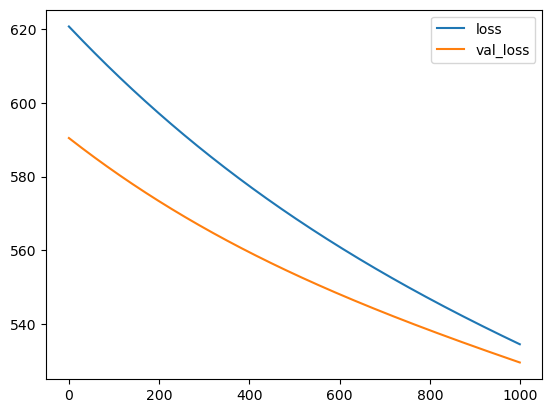

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()